In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/practice-hackathon/sample_submission.csv
/kaggle/input/practice-hackathon/Train.csv
/kaggle/input/practice-hackathon/Test.csv
/kaggle/input/iitgai/Train_Data.csv
/kaggle/input/iitgai/Test_Data1 (1).csv


I had applied various models like decision tress, linear regression,cross validation, random forest,svm etc. 
SVM turns out to be the best model so far. As I made changes to my notebook I  kept on removing older models. Due to endsems, I am unable to rewrite and explain my approach behind all. Please consider.

In [2]:
train_df = pd.read_csv("/kaggle/input/practice-hackathon/Train.csv")

In [3]:
train_df.shape

(3132, 9)

In [4]:
train_df.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [5]:
## Label encoding column A of our dataset
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_df['A']= label_encoder.fit_transform(train_df['A'])
  
train_df['A'].unique()

array([0, 2, 1])

In [6]:
X = train_df.drop(['Target'], axis=1)
y = train_df['Target']

<Axes: >

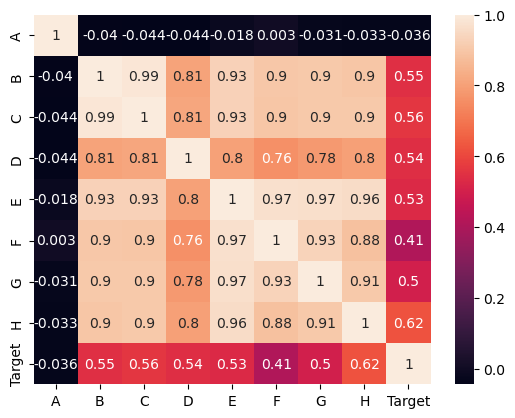

In [7]:
import seaborn as sns
%matplotlib inline

sns.heatmap(train_df.corr(),annot=True)

In [8]:
X=X.drop(["A"],axis=1)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [11]:
model = SVR()

In [12]:
param_grid = {
    'C': [0.1, 1, 10,100,0.01],
    'epsilon': [0.01, 0.1, 1,0.2,0.3,0.4],
    'gamma': ['scale', 'auto'],
    'kernel':['rbf','linear']
}

In [13]:
grid_search = GridSearchCV(model, param_grid, cv=6, scoring='neg_mean_squared_error')


In [14]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [15]:
y_pred = best_model.predict(X_val)

In [16]:
error= mean_squared_error(y_val, y_pred)
print(error)

3.7071621120066993


In [17]:
np.sqrt(error)

1.9253992084777378

In [18]:
test_data = pd.read_csv("/kaggle/input/practice-hackathon/Test.csv")

In [19]:
test_data.shape

(1045, 9)

In [20]:
test_data.head()

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [21]:
test_data['A']= label_encoder.fit_transform(test_data['A'])

In [22]:
Index=test_data['Index']
test_data.drop(['Index'],axis=1,inplace=True)


In [23]:
y_test = best_model.predict(test_data.drop(["A"],axis=1))

In [24]:
result = pd.DataFrame(Index, columns = ['Index'])
result['Target']= y_test

In [25]:
result

,Index,Target
0,866,11.680499
1,1483,9.491633
2,599,15.493422
3,1702,11.513508
4,670,11.569241
...,...,...
1040,532,9.464389
1041,3417,9.227268
1042,1505,11.558474
1043,2245,11.429854


In [26]:
result.to_csv("2090_Kashish.csv", index=False) #(for making submission file)

In [27]:

'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_val)
from sklearn.model_selection import cross_val_score
from sklearn import svm
svm_model = svm.SVR()
scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='r2')
svm_model.fit(X_train, y_train)

# Evaluate the model on the testing data
r2_score = svm_model.score(X_val, y_val)

print("Final R-squared:", r2_score)
y_pred=svm_model.predict(X_val)'''


'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\n\n# Fit the scaler on the training data\nscaler.fit(X_train)\n\n# Transform the training and testing data\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_val)\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn import svm\nsvm_model = svm.SVR()\nscores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring=\'r2\')\nsvm_model.fit(X_train, y_train)\n\n# Evaluate the model on the testing data\nr2_score = svm_model.score(X_val, y_val)\n\nprint("Final R-squared:", r2_score)\ny_pred=svm_model.predict(X_val)'